<a href="https://colab.research.google.com/github/itaewonflow/lecture-textmining-ml/blob/main/LDA_Gensim_20newsgroup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Itaewon flow github : https://github.com/itaewonflow
- Source Link : https://github.com/itaewonflow/lecture-textmining-ml/blob/main/LDA_Gensim_20newsgroup.ipynb
- Blog Link : https://decadepivot.com/lda-gensim-%ED%95%9C%EA%B8%80-%ED%86%A0%ED%94%BD%EB%AA%A8%EB%8D%B8%EB%A7%81-%EC%BD%94%EB%93%9C-%EC%84%A4%EB%AA%85/
---

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

#1.Data Loding

- fetch_20nersgroups를 이용
- 문서분류와는 달리 예측할 필요가 없으므로 학습데이타만 사용

In [ ]:
from sklearn.datasets import fetch_20newsgroups

categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space', 'comp.sys.ibm.pc.hardware', 'sci.crypt']

#학습 데이터셋을 가져옴
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories)

print('#Train set size:', len(newsgroups_train.data))
print('#Selected categories:', newsgroups_train.target_names)

#Train set size: 3219
#Selected categories: ['alt.atheism', 'comp.graphics', 'comp.sys.ibm.pc.hardware', 'sci.crypt', 'sci.space', 'talk.religion.misc']


In [ ]:
type(newsgroups_train.data)
print(len(newsgroups_train.data))

3219


- 사이킷런의 LDA라이브러리는 카운트 벡터를 입력으로 사용한다.
- **문서분류에서는 단어 수를 제한하지 않는 편이 가장 좋은 성능을 보였으나, 수행시간을 고려해 초기에 사용했던 인수들을 그대로 사용한다.**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(token_pattern="[\w']{3,}", stop_words='english', max_features=2000, min_df=5, max_df=0.5)
review_cv = cv.fit_transform(newsgroups_train.data)

#2.LDA Loding

- max_iter를 8로 설정하면 알고리즘은 최대 8번의 반복을 수행합니다. 각 반복은 다음과 같은 단계로 구성됩니다:

- 초기화: 알고리즘은 토픽-단어 및 문서-토픽 분포를 초기화합니다. 이 초기화는 일반적으로 무작위로 이루어집니다.

- E 단계 (Expectation): 문서에 할당된 토픽을 바탕으로 각 단어의 토픽에 대한 기여도를 추정합니다. 이 단계에서는 단어의 토픽 기여도를 계산하기 위해 토픽-단어 및 문서-토픽 분포를 사용합니다.

- M 단계 (Maximization): E 단계에서 추정된 토픽 기여도를 바탕으로 토픽-단어 및 문서-토픽 분포를 업데이트합니다. 이 단계에서는 기여도를 최대화하는 방향으로 분포를 조정합니다.

- 수렴 확인: 알고리즘은 E 단계와 M 단계를 번갈아가며 수행하면서 반복적으로 토픽 분포를 업데이트합니다. 이때, max_iter 횟수만큼 반복을 수행하거나 더 이상 토픽 분포가 크게 변하지 않을 때까지 반복합니다.

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np

lda = LatentDirichletAllocation(n_components = 10, #추출할 topic의 수
                                max_iter=5,
                                topic_word_prior=0.1,
                                doc_topic_prior=1.0,
                                learning_method='online',
                                n_jobs= -1, #사용 processor 수
                                random_state=0)

review_topics = lda.fit_transform(review_cv)

In [ ]:
print('\n#shape of review_topics:', review_topics.shape)
# print(review_cv[0])

print('\n#Sample of review_topics:', review_topics[0])
print('\n#Sample of review_topics:', review_topics[1])

gross_topic_weights = np.mean(review_topics, axis=0)
print('\n#Sum of topic weights of documents:', gross_topic_weights)
print('\n#shape of topic word distribution:', lda.components_.shape)
print('\n#shape of topic word distribution:', lda.components_[0])


#shape of review_topics: (3219, 10)

#Sample of review_topics: [0.9005077  0.00675405 0.02913509 0.00813948 0.0069041  0.00799194
 0.00772192 0.00746513 0.00668519 0.01869541]

#Sample of review_topics: [0.06022238 0.06133205 0.2045363  0.23399149 0.06000538 0.0403
 0.03271271 0.15694868 0.03499539 0.11495563]

#Sum of topic weights of documents: [0.08965855 0.08296082 0.08124668 0.11375681 0.11659477 0.13643934
 0.08502116 0.07179321 0.07154999 0.15097868]

#shape of topic word distribution: (10, 2000)

#shape of topic word distribution: [0.6490209  0.12329932 0.27325467 ... 0.10244684 0.10182576 0.10081394]


### 위 결과를 보면
- review_topics의 (3219,10)의 의미는 행은 각 문서 그대로, 열의 값들은 LDA가 추출한 토픽의 비중
- 즉, LDA변환결과는 각 문서별로 토픽분포를 보여준다

- review_topics의 첫째행을 출력하면 첫 문서의 각 토픽에 대한 분포를 볼 수 있다
- numpy로 열에 대해 총합을 구하면 문서 전체에 나타난 토픽의 평균 분포를 알 수 있다. 즉 말뭉치 전체에서는 10번째 토픽이 12.9%로 가장 많이 나타났으며, 다음이 11.9%인 6번째 퇴픽이다

- lda.components_의 shape을 출력해보면 (10,2000)이 나오는데, 이는 각 토픽에 대해 카운트 벡터에서 사용한 단어 2,000개의 비중을 표현하기 때문이다.

In [ ]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d: " % topic_idx, end='')
        print(", ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
        # 위 slicing에서 맨 뒤 -1은 역순을 의미, 역순으로 했을 때 처음부터 n_top_words까지

print_top_words(lda, cv.get_feature_names_out(), 10)

Topic #0: com, morality, keith, article, sgi, think, sandvik, caltech, objective, moral
Topic #1: image, graphics, file, files, ftp, available, software, use, data, pub
Topic #2: space, access, launch, earth, orbit, digex, lunar, shuttle, satellite, com
Topic #3: article, com, just, like, don't, university, i'm, nntp, host, posting
Topic #4: key, clipper, chip, encryption, com, government, law, keys, use, escrow
Topic #5: scsi, com, posting, nntp, host, thanks, bit, university, ibm, know
Topic #6: nasa, gov, university, host, posting, nntp, ___, distribution, center, washington
Topic #7: drive, com, disk, hard, controller, drives, dos, tape, problem, floppy
Topic #8: key, public, mail, faq, message, pgp, group, des, posting, university
Topic #9: god, people, don't, jesus, just, believe, say, does, think, know


- 가장 많이 언급된 단어들을 보기 위해서는 위와 같다.

##3. 최적의 토픽수 선택하는 방법

- 토픽모델링에서 가장 중요한 하이퍼 파라미터는 바로 토픽의 수
- 이를 위해 다양한 혼란도와 토픽 응집도를 계산하는 방법 존재
- 사이킷런은 혼란도만 공식적으로 제공
- 혼란도는 작을수록 좋다

n_components: 6, perplexity: 1063.362
n_components: 7, perplexity: 1045.636
n_components: 8, perplexity: 1015.561
n_components: 9, perplexity: 1016.494
n_components: 10, perplexity: 1028.560
n_components: 11, perplexity: 1036.692
n_components: 12, perplexity: 1032.437
n_components: 13, perplexity: 1038.319
n_components: 14, perplexity: 1040.664
n_components: 15, perplexity: 1046.556


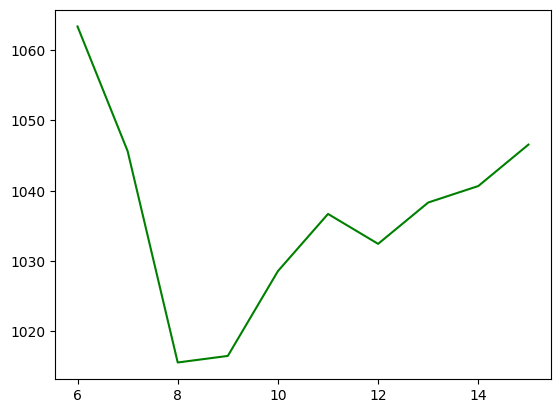

n_components with minimum perplexity: 8


In [ ]:
import matplotlib.pyplot as plt

def show_perplexity(cv, start=10, end=30, max_iter=5, topic_word_prior= 0.1,
                    doc_topic_prior=1.0):
    iter_num = []
    per_value = []

    for i in range(start, end + 1):
        lda = LatentDirichletAllocation(n_components = i, max_iter=max_iter,
                                        topic_word_prior= topic_word_prior,
                                        doc_topic_prior=doc_topic_prior,
                                        learning_method='batch', n_jobs= -1,
                                        random_state=7)
        lda.fit(cv)
        iter_num.append(i)
        pv = lda.perplexity(cv)
        per_value.append(pv)
        print(f'n_components: {i}, perplexity: {pv:0.3f}')

    plt.plot(iter_num, per_value, 'g-')
    plt.show()
    return start + per_value.index(min(per_value))

print("n_components with minimum perplexity:",
      show_perplexity(review_cv, start=6, end=15))

In [ ]:
lda = LatentDirichletAllocation(n_components = 8, #추출할 topic의 수를 지정
                                max_iter=20,
                                topic_word_prior= 0.1,
                                doc_topic_prior=1.0,
                                learning_method='batch',
                                n_jobs= -1,
                                random_state=7)

review_topics = lda.fit_transform(review_cv)
print_top_words(lda, cv.get_feature_names_out(), 10)

Topic #0: image, graphics, mail, available, file, ftp, data, files, software, information
Topic #1: nasa, gov, posting, space, university, host, nntp, ___, center, distribution
Topic #2: com, keith, article, morality, think, posting, nntp, caltech, don't, host
Topic #3: com, article, jesus, know, just, posting, host, nntp, don't, i'm
Topic #4: people, god, does, don't, think, say, believe, just, way, like
Topic #5: drive, scsi, card, com, disk, thanks, ide, controller, bus, hard
Topic #6: space, access, article, launch, just, year, like, digex, moon, com
Topic #7: key, encryption, clipper, chip, com, government, keys, use, security, public


# 4.Gensim을 이용한 토픽 모델링

-Gensim은 Word2Vec으로 잘 알려져 있으며, 토픽 모델링을 비롯해 의미적인 자연어 처리를 위한 다양한 라이브러리를 제공한다.

In [ ]:
!pip install --upgrade gensim

In [ ]:
# 필요한 library들을 import
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
import nltk
nltk.download('stopwords')

cachedStopWords = stopwords.words("english")
RegTok = RegexpTokenizer("[\w']{3,}") # 정규포현식으로 토크나이저를 정의
english_stops = set(stopwords.words('english')) #영어 불용어를 가져옴

def tokenizer(text):
    tokens = RegTok.tokenize(text.lower())
    # stopwords 제외
    words = [word for word in tokens if (word not in english_stops) and len(word) > 2]
    return words

texts = [tokenizer(news) for news in newsgroups_train.data]
print(texts)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



### 순서확인기

- Gensim은 먼저 토큰화 결과로부터 토큰과 gendim모듈이 내부적으로 사용하는 id를 매칭하는 사전을 생성 -> Dictionary 클래스 사용
- filter_extremes() 메소드에서, 사이킷런의 max_features에 해당하는 keep_n인수, min_df에 해당하는 no_below, max_df에 해당하는 no_above인수를 이용해 특성을 선택
- doc2bow()메소드로 토큰화된 결과를 카운트 벡터, 즉 BOW형태로 변환

In [ ]:
from gensim.corpora.dictionary import Dictionary

# 토큰화 결과로부터 dictionay 생성
dictionary = Dictionary(texts)
print('#Number of initial unique words in documents:', len(dictionary))

# 문서 빈도수가 너무 적거나 높은 단어를 필터링하고 특성을 단어의 빈도 순으로 선택
dictionary.filter_extremes(keep_n=2000, no_below=5, no_above=0.5)
print('#Number of unique words after removing rare and common words:', len(dictionary))

# 카운트 벡터로 변환
corpus = [dictionary.doc2bow(text) for text in texts]
print('#Number of unique tokens: %d' % len(dictionary))
print('#Number of documents: %d' % len(corpus))

#Number of initial unique words in documents: 46466
#Number of unique words after removing rare and common words: 2000
#Number of unique tokens: 2000
#Number of documents: 3219


- Gensim에서 LDA 모델을 수행하는 클래스인 LdaModel 시행
- num_topics : 토픽의 수
- id2word : Dictionary를 의미
- passes : 사이킷런의 max_iter와 같다고 보면 됨, 학습하는 횟수를 지정한다.


In [ ]:
from gensim.models import LdaModel

num_topics = 10
passes = 5
%time model = LdaModel(corpus=corpus,id2word=dictionary,passes=passes,num_topics=num_topics, random_state=7)

In [ ]:
model.print_topics(num_words=10)

- 숫자는 각 토픽으로 분류될 때 단어들의 기여도

- get_document_topics 메소드를 이용하면 인수로 넘긴 무너들에 대해 토픽 분포를 반환한다. 즉 인수로 corpus - BOW로 변환된 카운트 벡터를 요구하며, minimum_probability로 보여질 토픽의 비중에 대한 임계값을 설정할 수 있다.

In [ ]:
print("#topic distribution of the first document: ", model.get_document_topics(corpus)[0])

In [ ]:
!pip install pyLDAvis

In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

# feed the LDA model into the pyLDAvis instance
lda_viz = gensimvis.prepare(model, corpus, dictionary)
lda_viz

#Slide to adjust relevance metric:
#"Slide to adjust relevance metric"는 사용자가 관련성 메트릭(relevance metric)을 조정하기 위해 슬라이드를 움직일 수 있는 UI 요소를 의미합니다. 사용자는 이 슬라이드를 조작하여 토픽의 관련성을 적절하게 조정할 수 있습니다. 관련성 메트릭은 일반적으로 토픽의 단어들이 토픽 내에서 얼마나 빈번하게 나타나는지와 전체 단어 분포에 비해 얼마나 높은 확률로 나타나는지를 고려합니다.

- 응집도를 구하는 방법

In [ ]:
from gensim.models import CoherenceModel

cm = CoherenceModel(model=model, corpus=corpus, coherence='u_mass')
coherence = cm.get_coherence()
print(coherence)

In [ ]:
def show_coherence(corpus, dictionary, start=6, end=15):
    iter_num = []
    per_value = []
    coh_value = []

    for i in range(start, end + 1):
        model = LdaModel(corpus=corpus, id2word=dictionary,
                 chunksize=1000, num_topics=i,
                 random_state=7)
        iter_num.append(i)
        pv = model.log_perplexity(corpus)
        per_value.append(pv)

        cm = CoherenceModel(model=model, corpus=corpus,
                            coherence='u_mass')
        cv = cm.get_coherence()
        coh_value.append(cv)
        print(f'num_topics: {i}, perplexity: {pv:0.3f}, coherence: {cv:0.3f}')

    plt.plot(iter_num, per_value, 'g-')
    plt.xlabel("num_topics")
    plt.ylabel("perplexity")
    plt.show()

    plt.plot(iter_num, coh_value, 'r--')
    plt.xlabel("num_topics")
    plt.ylabel("coherence")
    plt.show()

show_coherence(corpus, dictionary, start=6, end=15)